# Duboko učenje

### 4. laboratorijska vježba - Generativni modeli

*Zagreb, 31.05.2020.*

## Izjava

Tekstovi zadataka se koriste samo u edukativne svrhe, te njihova prava još uvijek pripadaju autorima. Tekstovi zadatka preuzeti su sa [sljedeće poveznice](https://dlunizg.github.io/lab4/). Također, bilo kakve izmjene su isključivo radi estetike, i ne mijenjaju intelektualnog vlasnika na mene ili bilo kog tko uređuje ovu datoteku.

## Sadržaj

- [Zadatak 4](#Zadatak-4)
- [Zadatak 5](#Zadatak-5)

# Učitavanje resursa

In [1]:
import os

Pobrinimo se da smo u korijenu projekta radi lakšeg adresiranja stvari:

In [2]:
if "--IN_ROOT" not in os.environ:
    os.environ["--IN_ROOT"] = "false"

In [3]:
if len(os.environ["--IN_ROOT"]) == 0 or os.environ["--IN_ROOT"] == "false":
    %cd ..
else:
    print(os.getcwd())

os.environ["--IN_ROOT"] = "true"

/mnt/data/projekti/faks/DUBUCE/LAB4


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np

In [5]:
from bin.task_4 import VAE
from bin.task_5 import Discriminator, Generator, DCGAN

from util.paths import *
from util.processing import get_datasets, get_gan_datasets

/home/ljac/.pyenv/versions/3.6.10/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [6]:
from IPython.display import display, Markdown

## Inicijalizacija globalnih varijabli

In [7]:
default_device = "cuda"

### Podatkovni skupovi

In [8]:
dataset_tr, dataset_val = get_datasets(DEFAULT_MNIST_FOLDER)
dataset_gan_tr, dataset_gan_val = get_gan_datasets(DEFAULT_MNIST_FOLDER)

# Zadatak 4

### Varijacijski autoenkoder

#### [Zadatak 5 ->](#Zadatak-5)

Implementirajte VAE s $20$ skrivenih varijabli $z$. Ulazni podaci neka su MNIST brojevi. Enkoder i dekoder neka imaju po $2$ skrivena sloja, svaki s $200$ neurona sa **softplus** aktivacijskim funkcijama.

#### Učenje modela

In [9]:
vae20_model = VAE(encoder_units=(200, 200),
                  bottleneck_size=20,
                  decoder_units=(200, 200),
                  data_units=784)

In [10]:
if os.path.exists(VAE20_WEIGHTS_PATH):
    vae20_model.load_state_dict(torch.load(VAE20_WEIGHTS_PATH))
    print(f"Učitan model s {VAE20_WEIGHTS_PATH}!")
else:
    vae20_model.fit(dataset=dataset_tr,
                    n_epochs=100,
                    batch_size=1024,
                    learning_rate=3e-4,
                    lr_gamma=0.91,
                    kl_beta_sine_multiplier=0.3,
                    device=default_device,
                    verbose=1)

    torch.save(vae20_model.state_dict(), VAE20_WEIGHTS_PATH)

Učitan model s models/task-4/vae20.pt!


**Dodatak**

S obzirom na to da je naša metoda učenja malo nekarakteristična, naučit ćemo model i bez ovih modifikacija:

In [11]:
vae20_unmodded_model = VAE(encoder_units=(200, 200),
                           bottleneck_size=20,
                           decoder_units=(200, 200),
                           data_units=784)

In [12]:
if os.path.exists(VAE20_WEIGHTS_UNMODDED_PATH):
    vae20_unmodded_model.load_state_dict(torch.load(VAE20_WEIGHTS_UNMODDED_PATH))
    print(f"Učitan model s {VAE20_WEIGHTS_UNMODDED_PATH}!")
else:
    vae20_unmodded_model.fit(dataset=dataset_tr,
                             n_epochs=100,
                             batch_size=1024,
                             learning_rate=3e-4,
                             lr_gamma=1.,
                             kl_beta_sine_multiplier=None,
                             device=default_device,
                             verbose=1)

    torch.save(vae20_unmodded_model.state_dict(), VAE20_WEIGHTS_UNMODDED_PATH)

Učitan model s models/task-4/vae20unmod.pt!


#### Podzadatak 1 - Vizualizacija rekonstrukcije

Vizualizirajte rezultate rekonstrukcije za prvih $20$ testnih uzoraka MNIST baze.

**Odgovor**

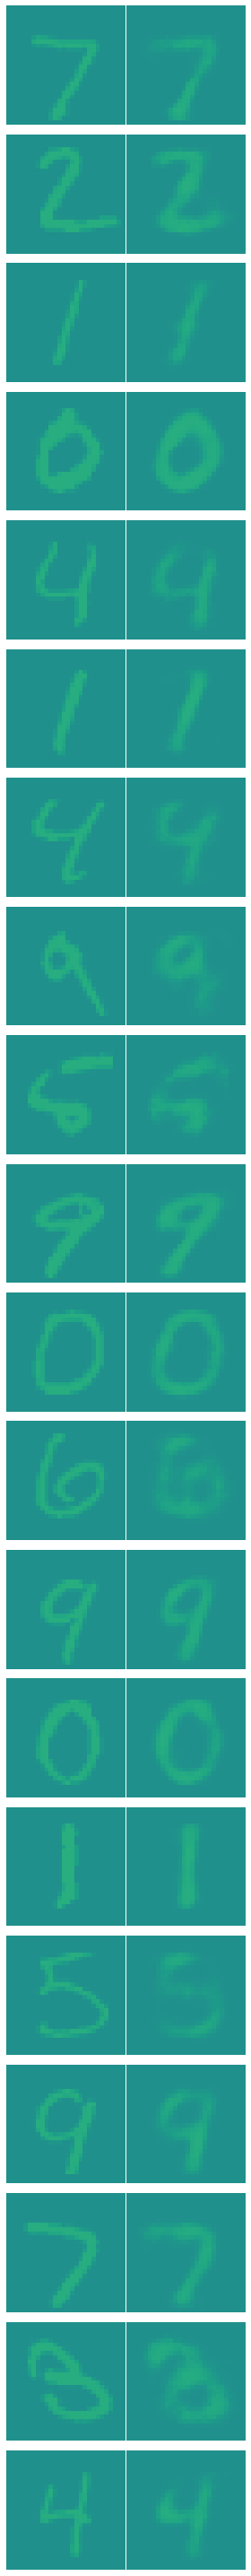

In [13]:
task4_fig_1, task4_ax_1 = vae20_model.plot_io(dataset=dataset_val, n_samples=20, device=default_device)

A za normalno trenirani model:

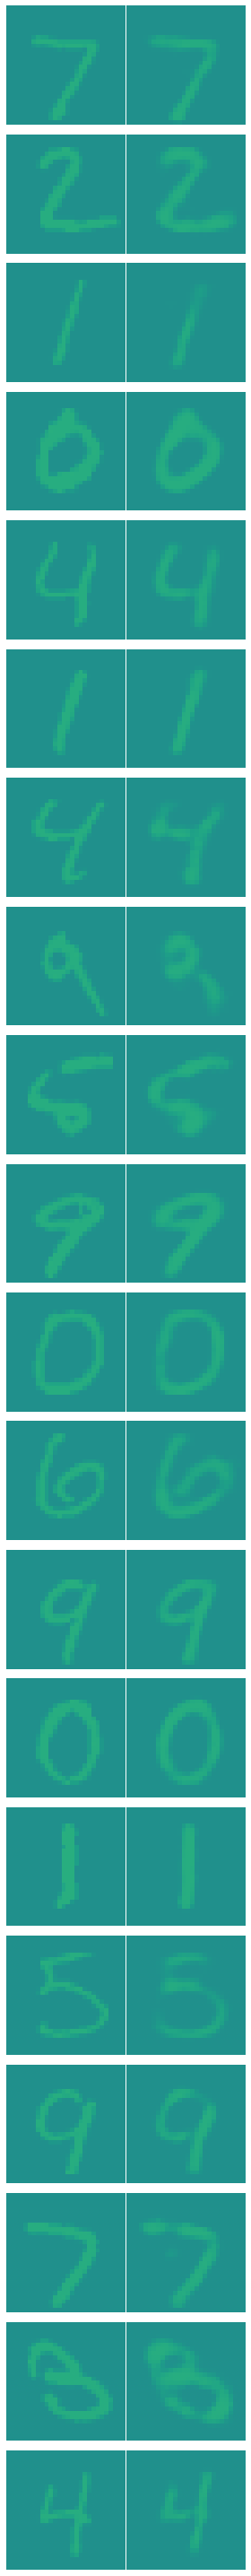

In [14]:
task4_fig_1_, task4_ax_1_ = vae20_unmodded_model.plot_io(dataset=dataset_val,
                                                         n_samples=20,
                                                         device=default_device)

#### Podzadatak 2 - Vizualizacija distribucija parametara $z$

Vizualizirajte distribucije srednjih vrijednosti i standardnih devijacija skrivenih varijabli $z$ za primjereni broj ulaznih uzoraka

**Odgovor**

In [15]:
task4_mu_df_1, task4_stddev_df_1 = vae20_model.generate_mu_and_stddev_dataframes(dataset_val,
                                                                                 "cuda")

100%|██████████| 10000/10000 [00:10<00:00, 942.10it/s]


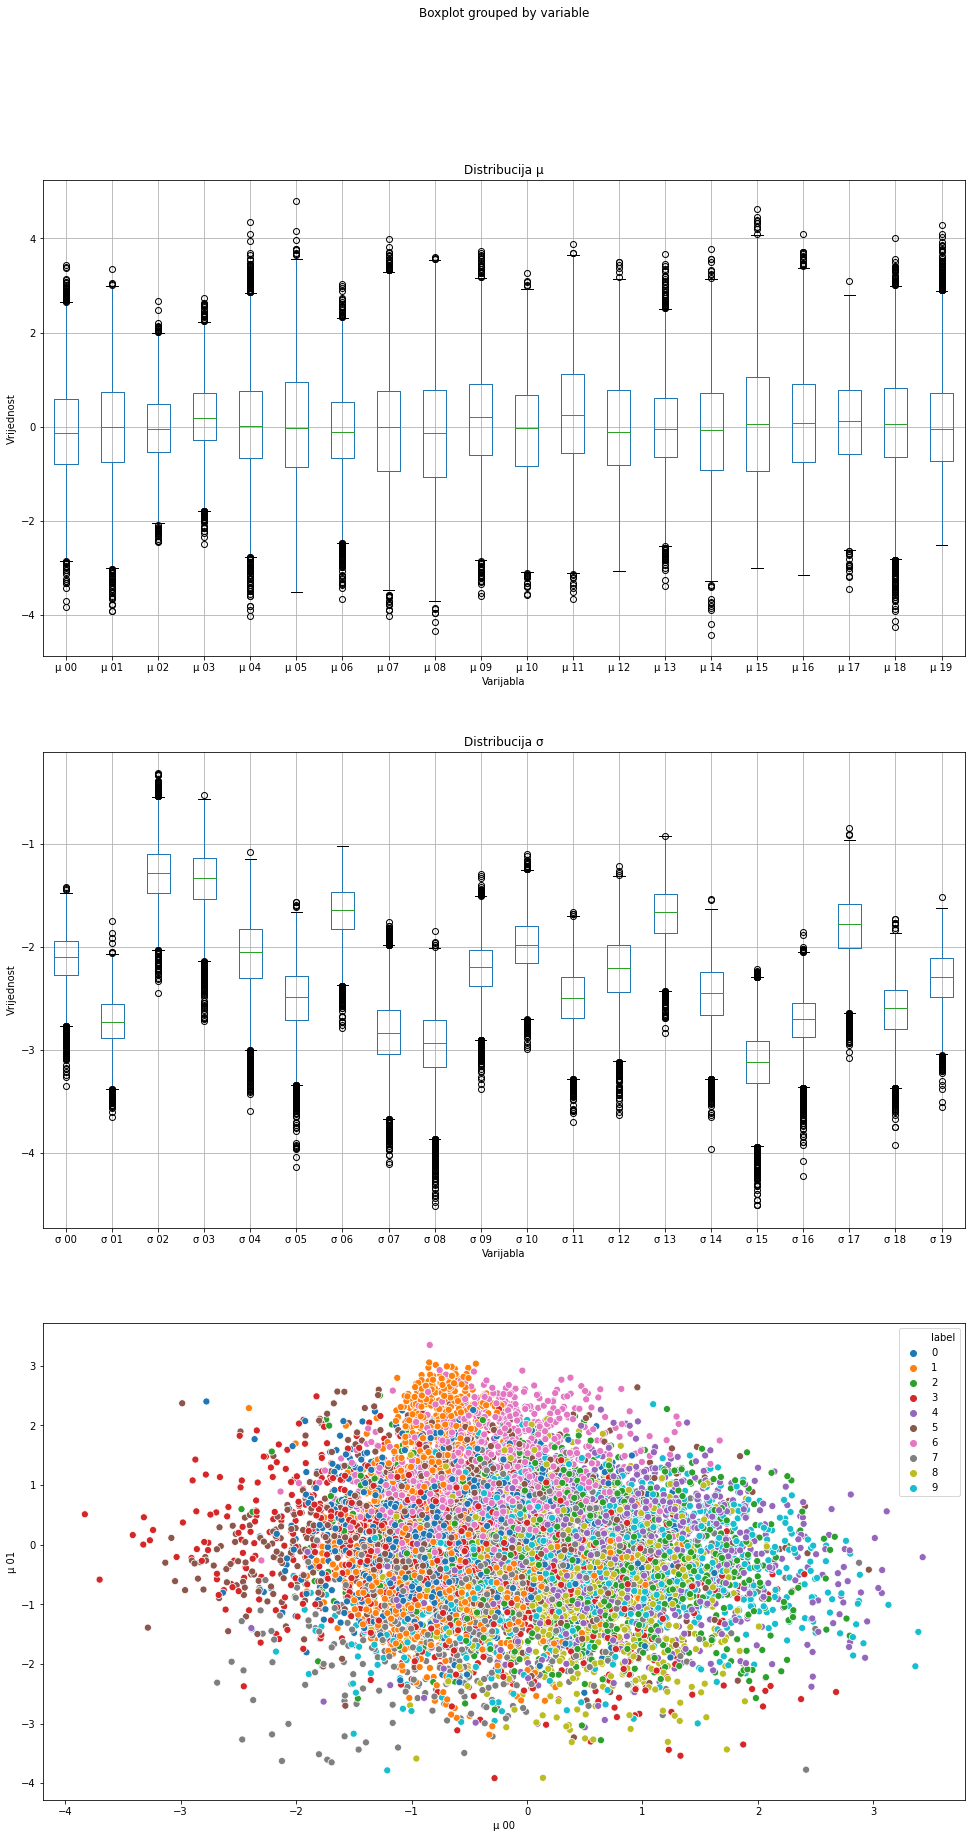

In [16]:
task4_fig_2, task4_ax_2 = VAE.plot_distribution(mu_dataframe=task4_mu_df_1,
                                                stddev_dataframe=task4_stddev_df_1)

In [17]:
task4_mu_df_1_, task4_stddev_df_1_ = vae20_unmodded_model.generate_mu_and_stddev_dataframes(dataset_val,
                                                                                            "cuda")

100%|██████████| 10000/10000 [00:10<00:00, 932.86it/s]


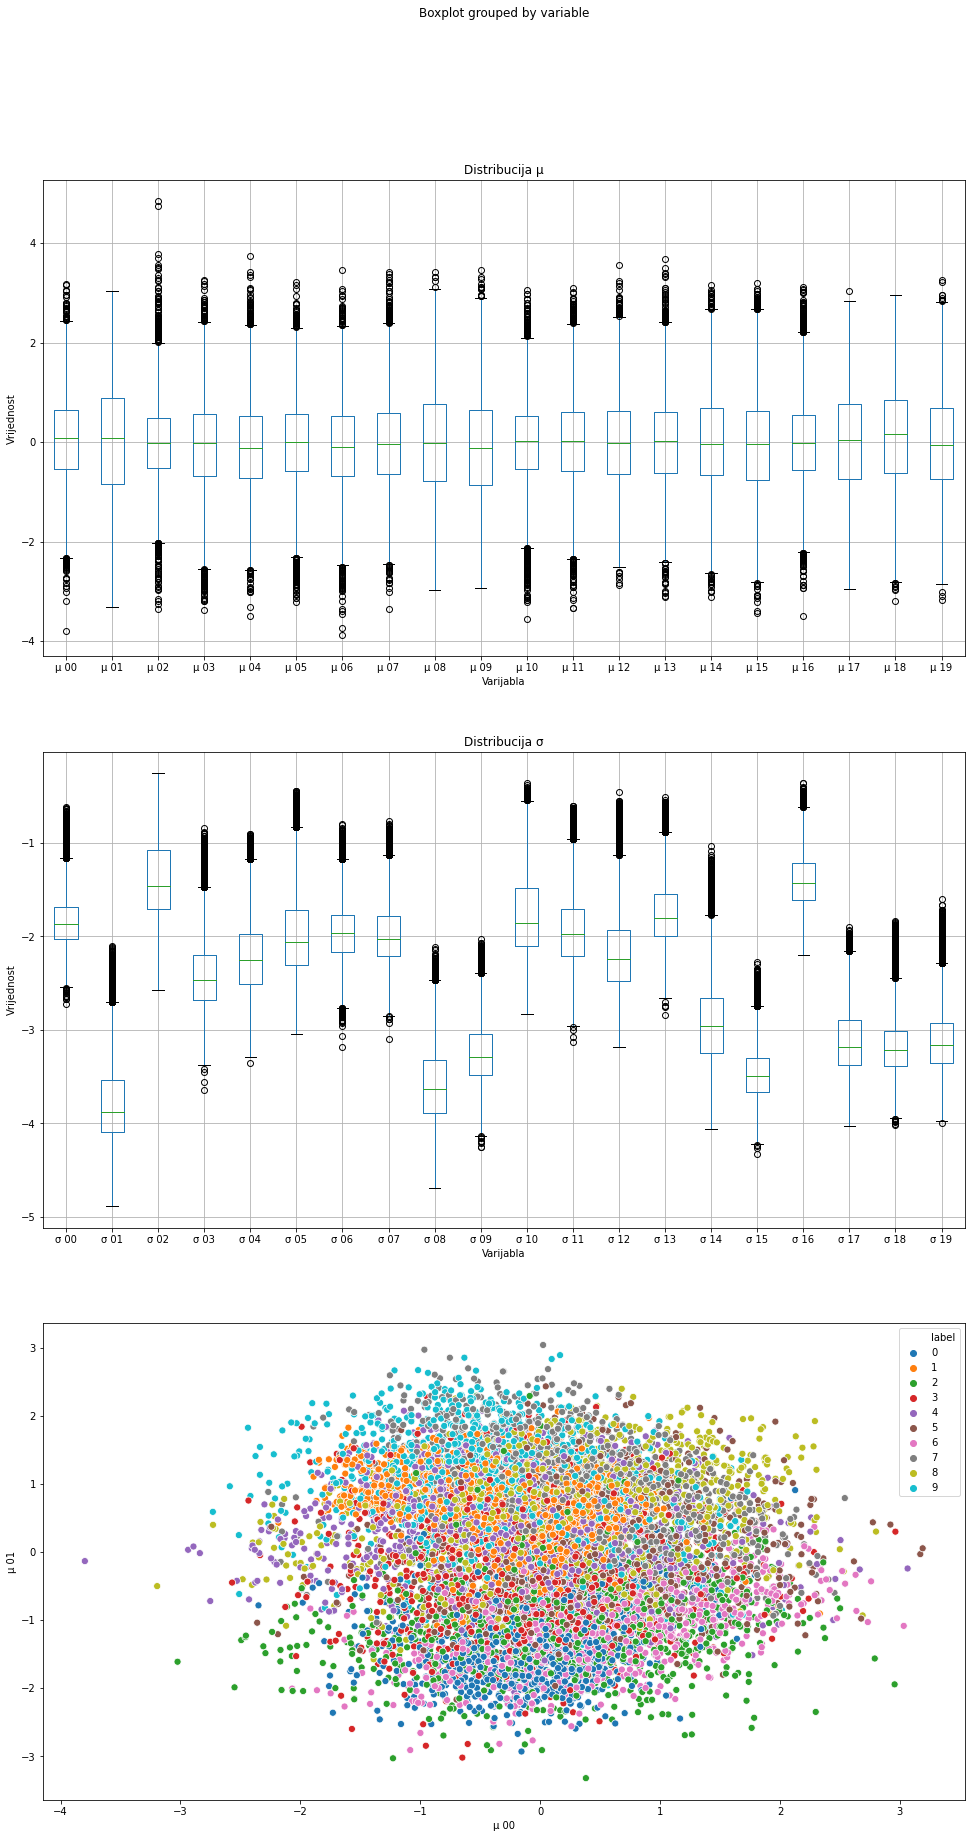

In [18]:
task4_fig_2_, task4_ax_2_ = VAE.plot_distribution(mu_dataframe=task4_mu_df_1_,
                                                  stddev_dataframe=task4_stddev_df_1_)

#### Podzadatak 3 - šetanje u latentnom prostoru

Vizualizirajte raspored testnih uzoraka u 2D prostoru skrivenih varijabli.

**Odgovor**

In [19]:
# Dana funkcija ne radi!
"""
task4_fig_3, task4_ax_3 = vae20_model.plot_latent_space(n_samples=15,
                                                        latent_space_limit=1.5,
                                                        device=default_device)
""";

#### Podzadatak 4 - Sve iznad na manjem VAE

Ponovite eksperimente iz prethodnih podzadataka za samo $2$ elementa u skrivenenom sloju $z$.

In [20]:
vae02_model = VAE(encoder_units=(200, 200),
                  bottleneck_size=2,
                  decoder_units=(200, 200),
                  data_units=784)

In [21]:
if os.path.exists(VAE02_WEIGHTS_PATH):
    vae02_model.load_state_dict(torch.load(VAE02_WEIGHTS_PATH))
    print(f"Učitan model s {VAE02_WEIGHTS_PATH}!")
else:
    vae02_model.fit(dataset=dataset_tr,
                    n_epochs=100,
                    batch_size=1024,
                    learning_rate=3e-4,
                    lr_gamma=0.91,
                    kl_beta_sine_multiplier=0.3,
                    device=default_device,
                    verbose=1)

    torch.save(vae02_model.state_dict(), VAE02_WEIGHTS_PATH)

Učitan model s models/task-4/vae02.pt!


**Dodatak**

S obzirom na to da je naša metoda učenja malo nekarakteristična, naučit ćemo model i bez ovih modifikacija:

In [22]:
vae02_unmodded_model = VAE(encoder_units=(200, 200),
                           bottleneck_size=2,
                           decoder_units=(200, 200),
                           data_units=784)

In [23]:
if os.path.exists(VAE02_WEIGHTS_UNMODDED_PATH):
    vae02_unmodded_model.load_state_dict(torch.load(VAE02_WEIGHTS_UNMODDED_PATH))
    print(f"Učitan model s {VAE02_WEIGHTS_UNMODDED_PATH}!")
else:
    vae02_unmodded_model.fit(dataset=dataset_tr,
                             n_epochs=100,
                             batch_size=1024,
                             learning_rate=3e-4,
                             lr_gamma=1.,
                             kl_beta_sine_multiplier=None,
                             device=default_device,
                             verbose=1)

    torch.save(vae02_unmodded_model.state_dict(), VAE02_WEIGHTS_UNMODDED_PATH)

Učitan model s models/task-4/vae02unmod.pt!


#### Podzadatak 4.1

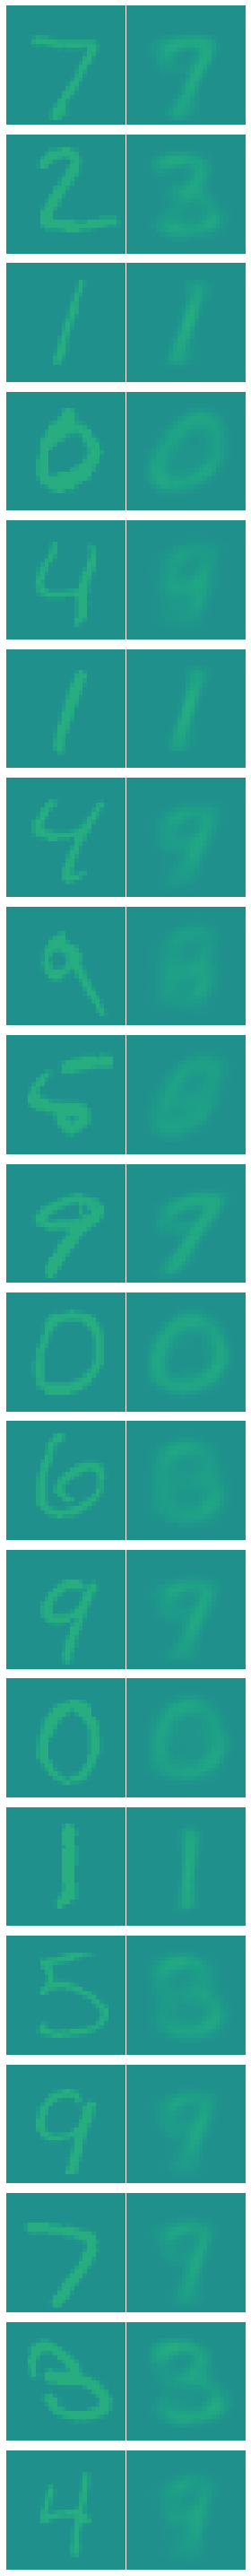

In [24]:
task4_fig_4, task4_ax_4 = vae02_model.plot_io(dataset=dataset_val,
                                              n_samples=20,
                                              device=default_device)

A za normalno trenirani model:

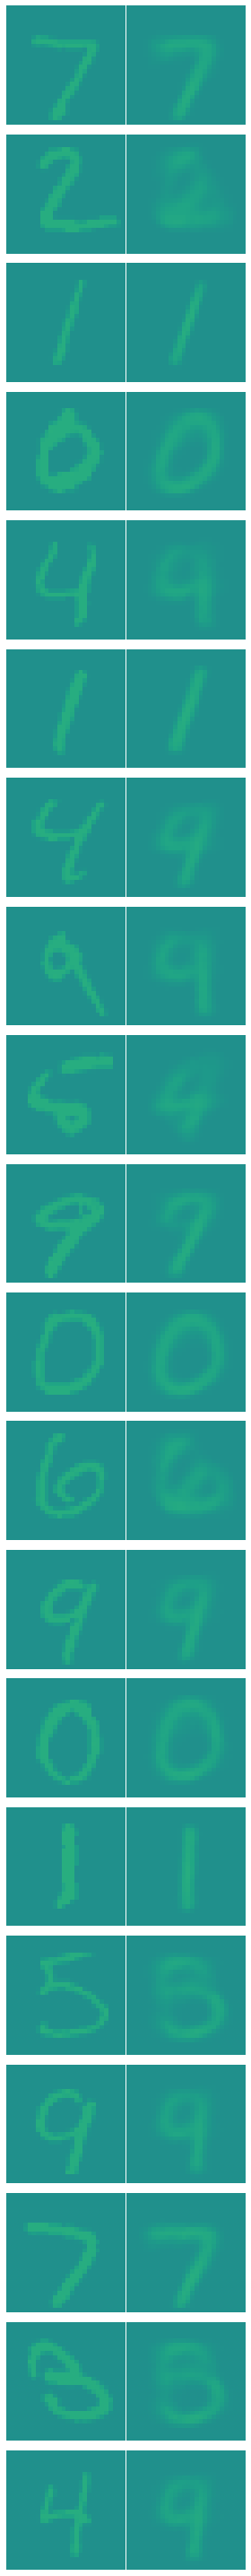

In [25]:
task4_fig_4_, task4_ax_4_ = vae02_unmodded_model.plot_io(dataset=dataset_val,
                                                         n_samples=20,
                                                         device=default_device)

#### Podzadatak 4.2

In [26]:
task4_mu_df_2, task4_stddev_df_2 = vae02_model.generate_mu_and_stddev_dataframes(dataset_val,
                                                                                 "cuda")

100%|██████████| 10000/10000 [00:10<00:00, 924.51it/s]


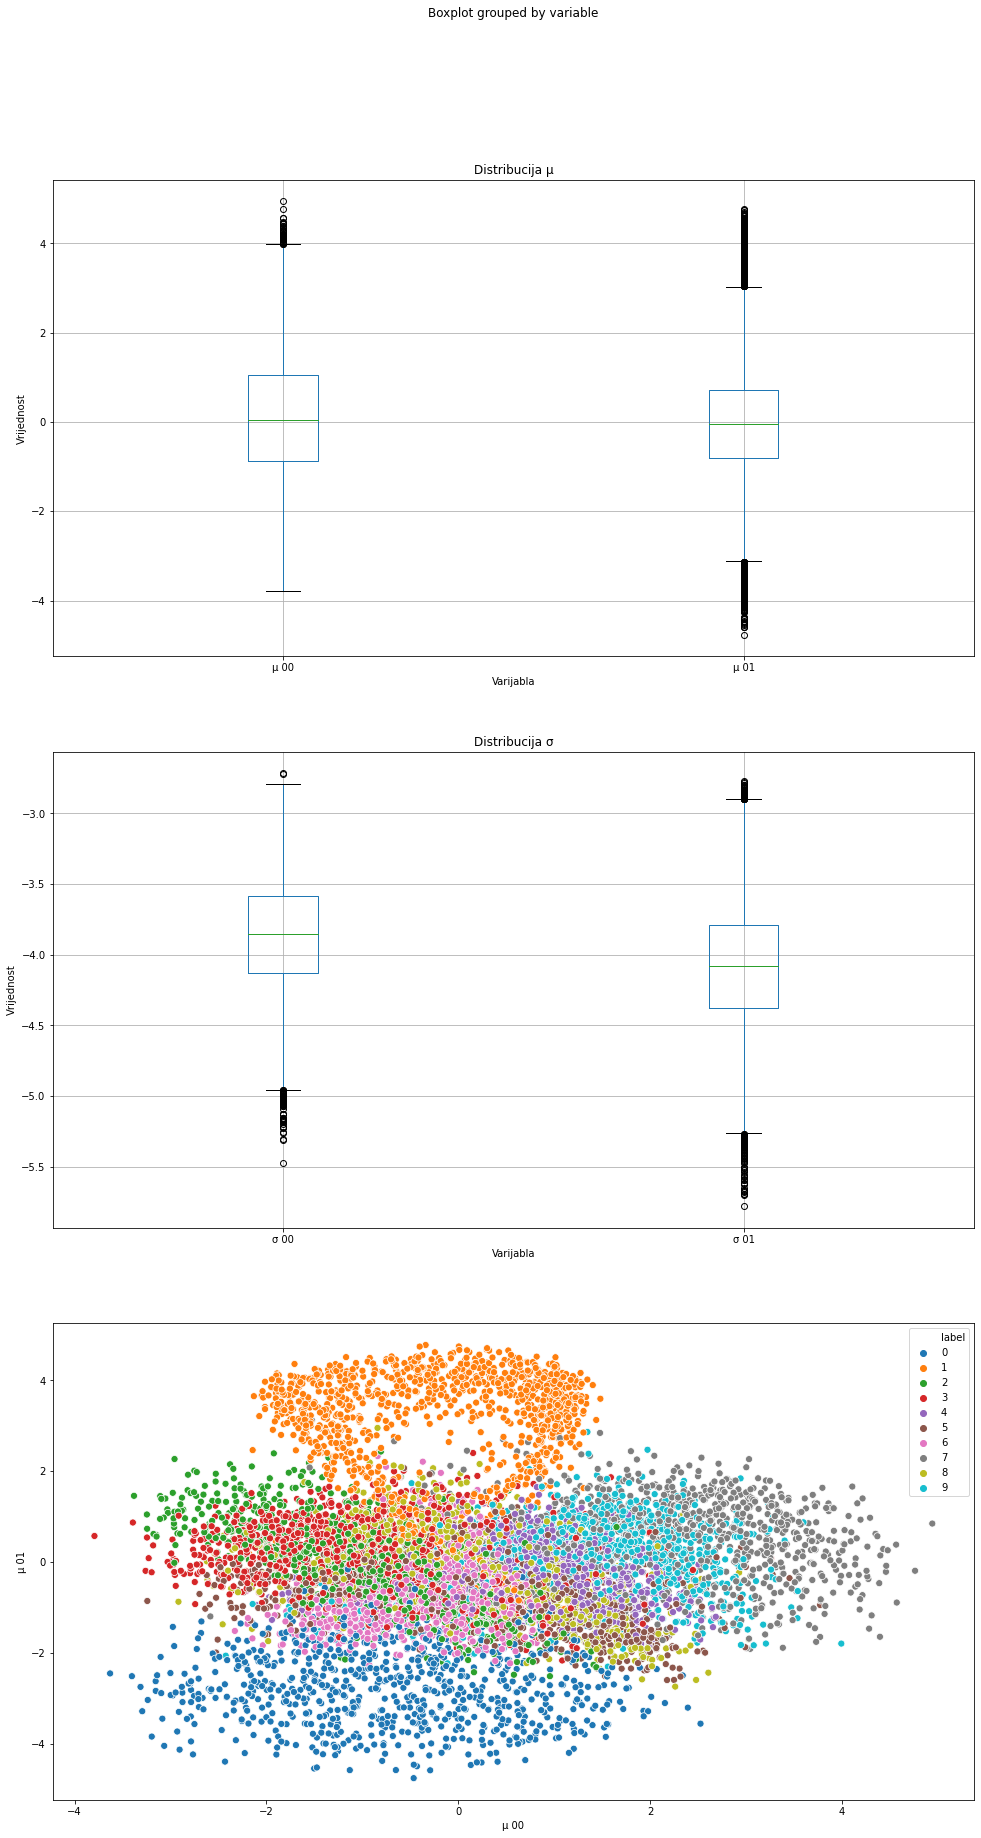

In [27]:
task4_fig_5, task4_ax_5 = VAE.plot_distribution(mu_dataframe=task4_mu_df_2,
                                                stddev_dataframe=task4_stddev_df_2)

In [28]:
task4_mu_df_2_, task4_stddev_df_2_ = vae02_unmodded_model.generate_mu_and_stddev_dataframes(dataset_val,
                                                                                            "cuda")

100%|██████████| 10000/10000 [00:10<00:00, 924.22it/s]


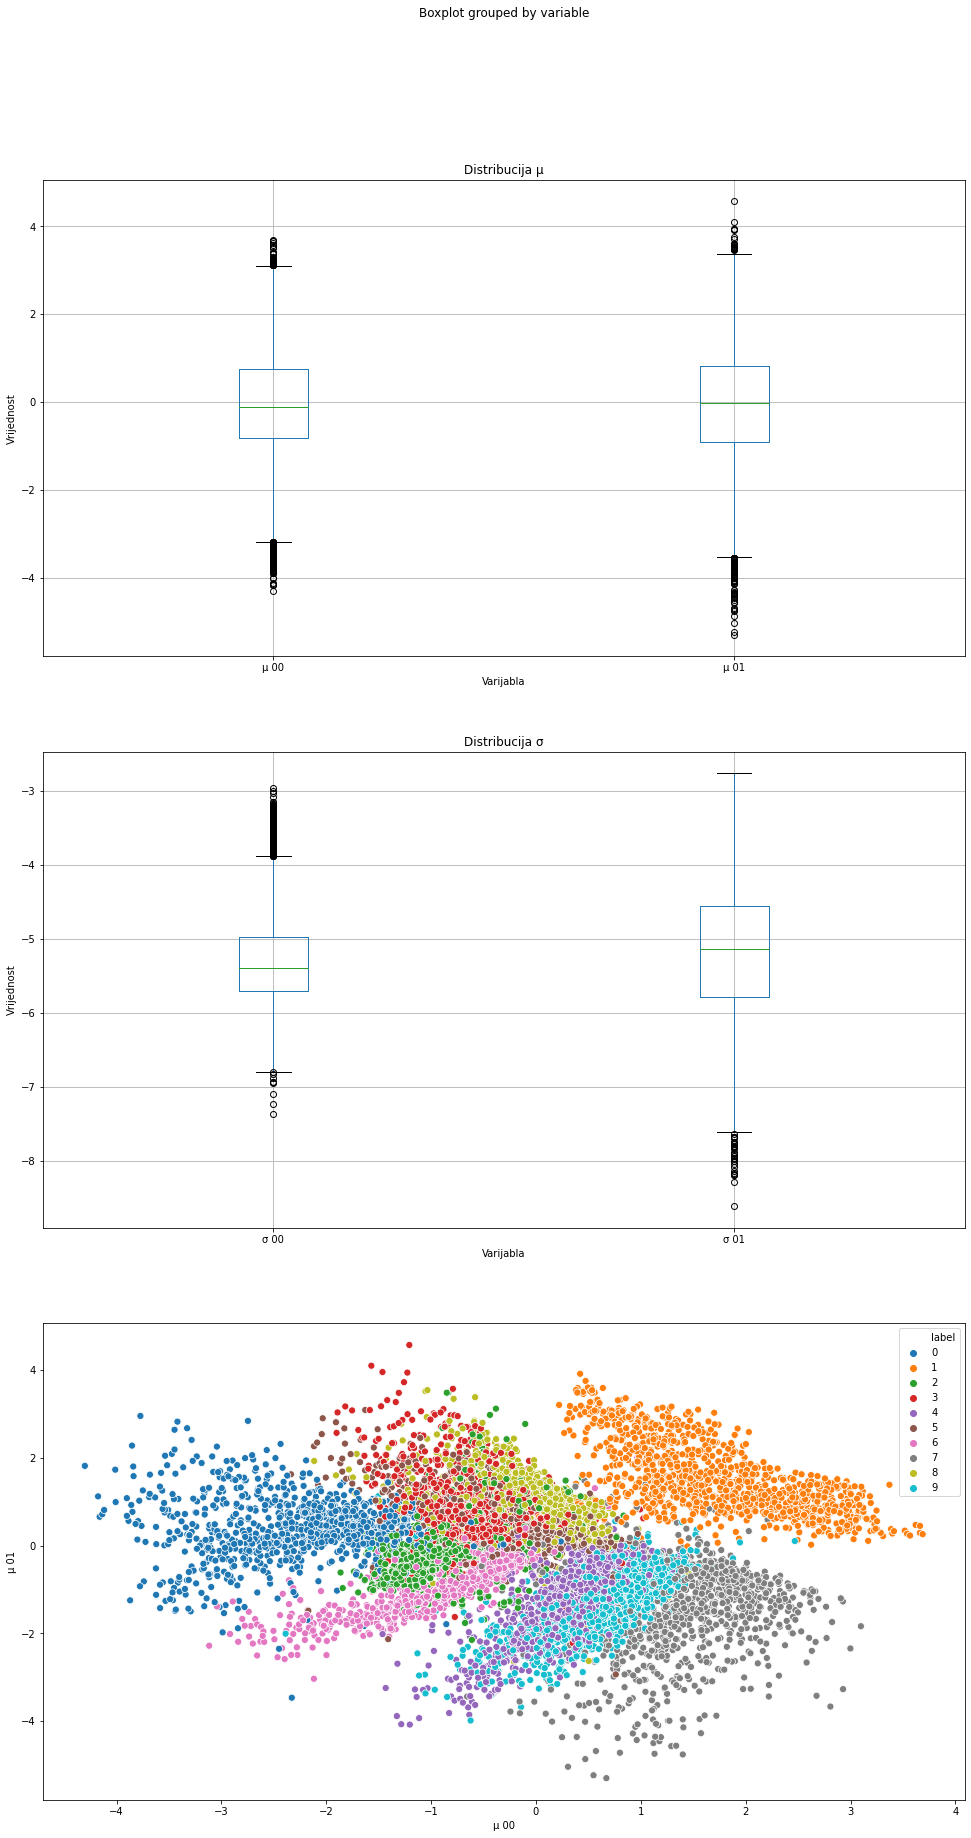

In [29]:
task4_fig_5_, task4_ax_5_ = VAE.plot_distribution(mu_dataframe=task4_mu_df_2_,
                                                  stddev_dataframe=task4_stddev_df_2_)

#### Podzadatak 4.3

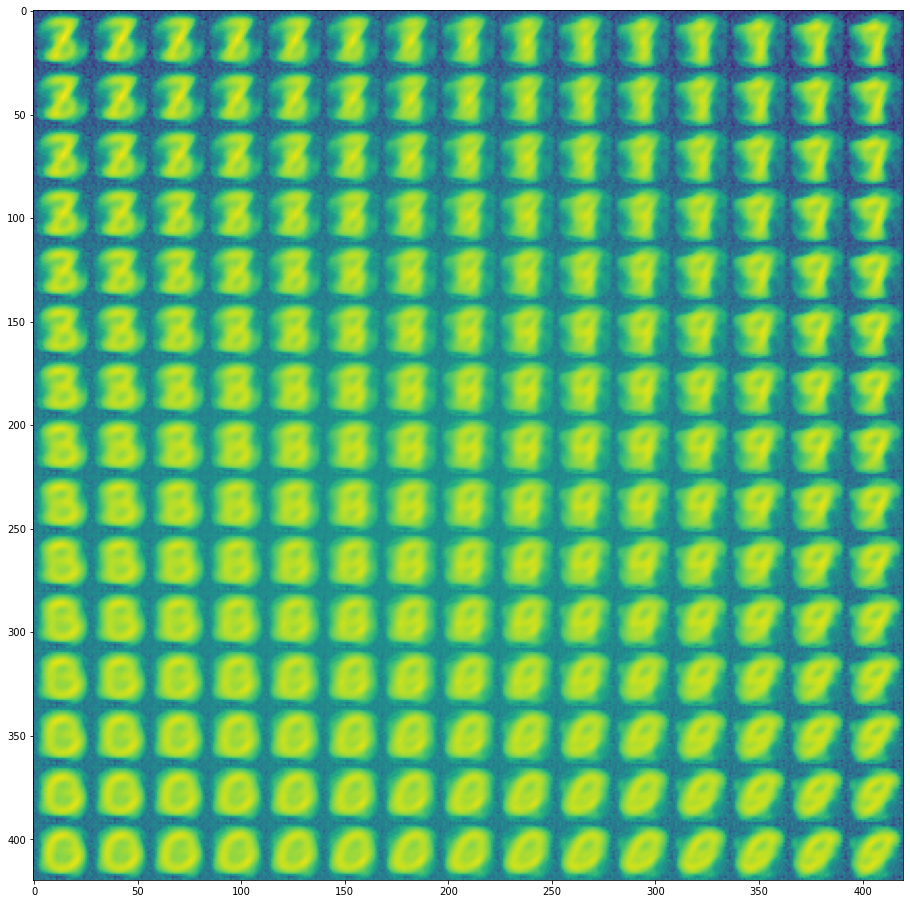

In [30]:
task4_fig_6, task4_ax_6 = vae02_model.plot_latent_space(n_samples=15,
                                                        latent_space_limit=1.5,
                                                        device=default_device)

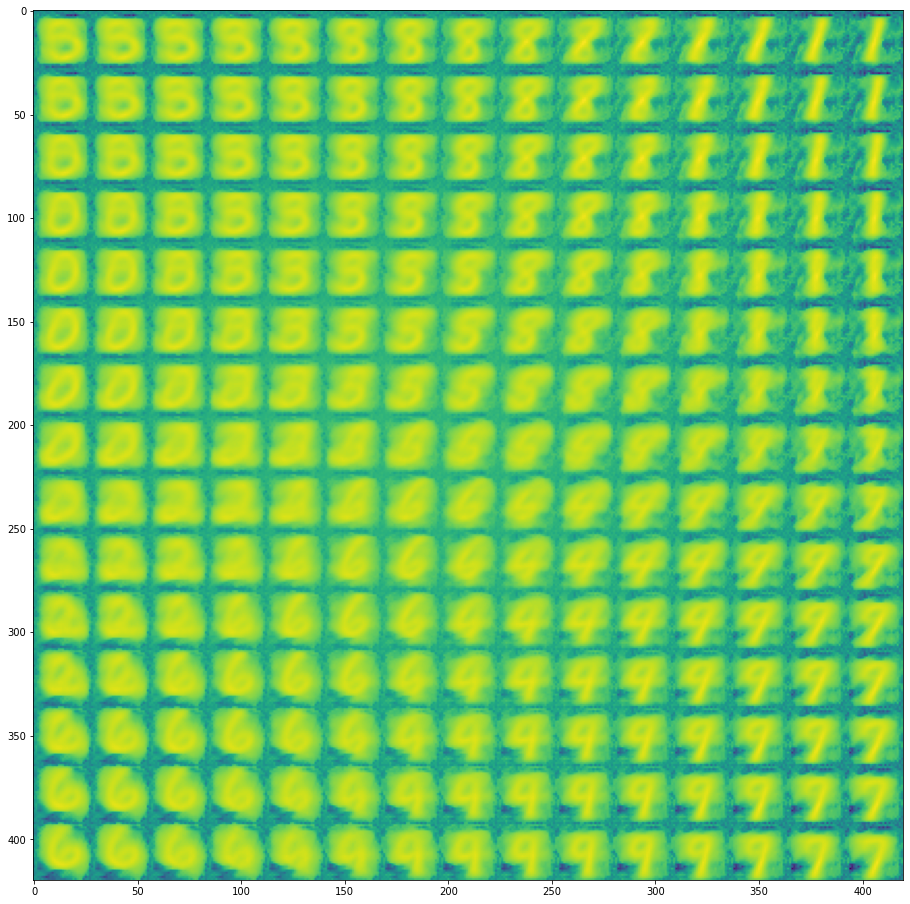

In [31]:
task4_fig_6_, task4_ax_6_ = vae02_unmodded_model.plot_latent_space(n_samples=15,
                                                                   latent_space_limit=1.5,
                                                                   device=default_device)

# Zadatak 5

###  Generativne protivničke mreže (GAN)

#### [<- Zadatak 4](#Zadatak-4)

Implementirajte DCGAN s generatorom i diskriminatorom. Arhitekura treba biti:

#### Generator

- Ulaz - $100$ elemenata prema normalnoj distribuciji $N(0, 1)$
- Sloj 1 - Broj izlaznih kanala = $512$, veličina jezgre = $4$, veličina koraka = $1$, padding = $0$
- Sloj 2 - Broj izlaznih kanala = $256$, veličina jezgre = $4$, veličina koraka = $2$, padding = $1$
- Sloj 3 - Broj izlaznih kanala = $128$, veličina jezgre = $4$, veličina koraka = $2$, padding = $1$
- Sloj 4 - Broj izlaznih kanala = $64$, veličina jezgre = $4$, veličina koraka = $2$, padding = $1$
- Sloj 5 - Broj izlaznih kanala = $1$, veličina jezgre = $4$, veličina koraka = $2$, padding = $1$

#### Diskriminator

- Ulaz - MNIST brojevi skalirani na veličinu $64 \times 64$
- Sloj 1 - Broj izlaznih konvolucija = $64$, veličina jezgre = $4$, veličina koraka = $2$, padding = $1$
- Sloj 2 - Broj izlaznih konvolucija = $128$, veličina jezgre = $4$, veličina koraka = $2$, padding = $1$
- Sloj 3 - Broj izlaznih konvolucija = $256$, veličina jezgre = $4$, veličina koraka = $2$, padding = $1$
- Sloj 4 - Broj izlaznih konvolucija = $512$, veličina jezgre = $4$, veličina koraka = $2$, padding = $1$
- Sloj 5 - Broj izlaznih konvolucija = $1$, veličina jezgre = $4$, veličina koraka = $1$, padding = $0$

Treniranje provedite kroz barem $20$ epoha. U jednoj iteraciji provedite jednu optimizaciju generatora i jednu optimizaciju diskriminatora s po jednom mini grupom. Koristite tanh aktivacijsku funkciju za izlaz generatora i sigmoid aktivaciju za izlaz diskriminatora, a za ostaje slojeve “propustljivi” ReLU sa “negative_slope” parametrom od $0.2$. Batch normalizacija (jedan od podzadataka) ide iza svakog sloja.

#### Podzadatak 1

Vizualizirajte rezultate generiranja $100$ novih uzoraka iz slučajnih vektora $z$. Usporedite rezultate s uzorcima generiranim pomoću VAE.

**Odgovor**

Prvo trebamo naučiti model:

In [32]:
task5_discriminator_1 = Discriminator(in_channels=1,
                                      channels=(64, 128, 256, 512, 1),
                                      kernels=(4, 4, 4, 4, 4),
                                      strides=(2, 2, 2, 2, 1),
                                      padding=(1, 1, 1, 1, 0),
                                      leaky_relu_slope=0.2,
                                      use_batch_norm=True)

task5_generator_1 = Generator(input_size=100,
                              channels=(512, 256, 128, 64, 1),
                              kernels=(4, 4, 4, 4, 4),
                              strides=(1, 2, 2, 2, 2),
                              padding=(0, 1, 1, 1, 1),
                              leaky_relu_slope=0.2,
                              use_batch_norm=True)

task5_dcgan = DCGAN(discriminator=task5_discriminator_1,
                    generator=task5_generator_1)

In [33]:
if os.path.exists(GAN11BN_WEIGHTS_PATH):
    task5_dcgan.load_state_dict(torch.load(GAN11BN_WEIGHTS_PATH))
    print(f"Učitan model s {GAN11BN_WEIGHTS_PATH}!")
else:
    task5_dcgan.fit(dataset=dataset_gan_tr,
                    n_epochs=20,
                    batch_size=256,
                    learning_rate=3e-4,
                    lr_gamma=0.91,
                    device=default_device,
                    verbose=1)

    torch.save(task5_dcgan.state_dict(), GAN11BN_WEIGHTS_PATH)

Učitan model s models/task-5/gan11bn.pt!


Sad možemo prikazati rezultate:

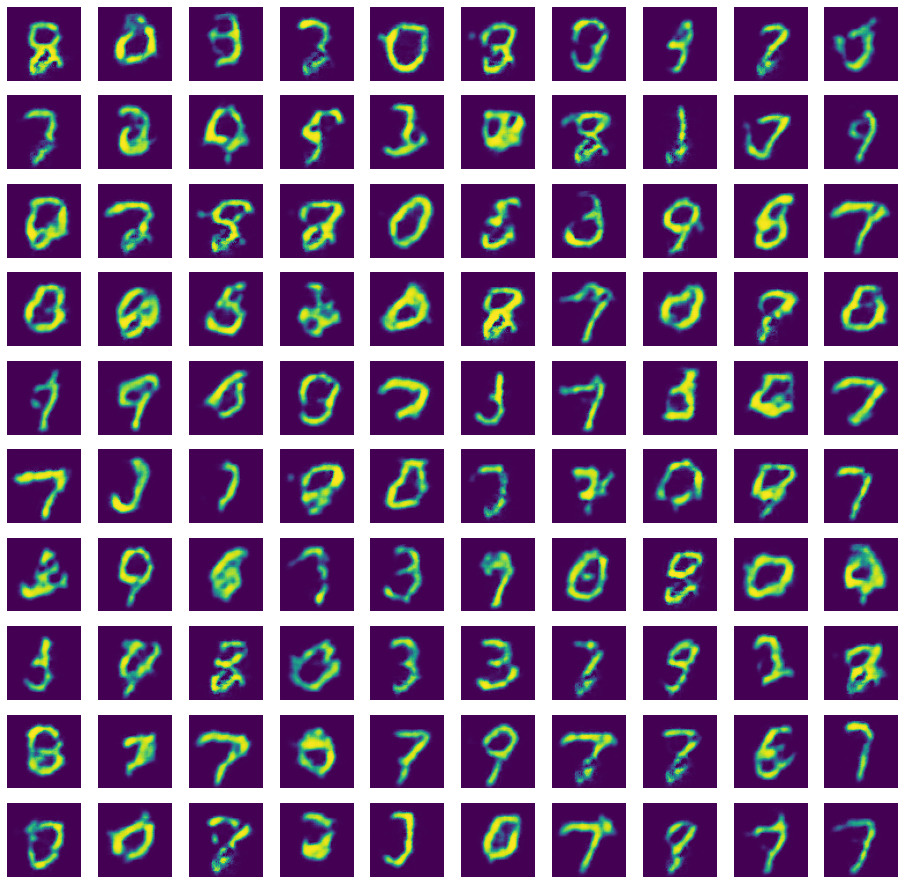

In [34]:
task5_dcgan.plot_generations(n_samples=100,
                             shape=(10, 10),
                             base_size=(1.6, 1.6),
                             device="cuda");

Ako učitamo VAE,

In [35]:
task5_vae20 = VAE(encoder_units=(200, 200),
                  bottleneck_size=20,
                  decoder_units=(200, 200),
                  data_units=784)

In [36]:
if os.path.exists(VAE20_WEIGHTS_PATH):
    task5_vae20.load_state_dict(torch.load(VAE20_WEIGHTS_PATH))
    print(f"Učitan model s {VAE20_WEIGHTS_PATH}!")
else:
    task5_vae20.fit(dataset=dataset_tr,
                    n_epochs=100,
                    batch_size=1024,
                    learning_rate=3e-4,
                    lr_gamma=0.91,
                    kl_beta_sine_multiplier=0.3,
                    device=default_device,
                    verbose=1)

    torch.save(task5_vae20.state_dict(), VAE20_WEIGHTS_PATH)

Učitan model s models/task-4/vae20.pt!


Možemo usporediti rezultate:

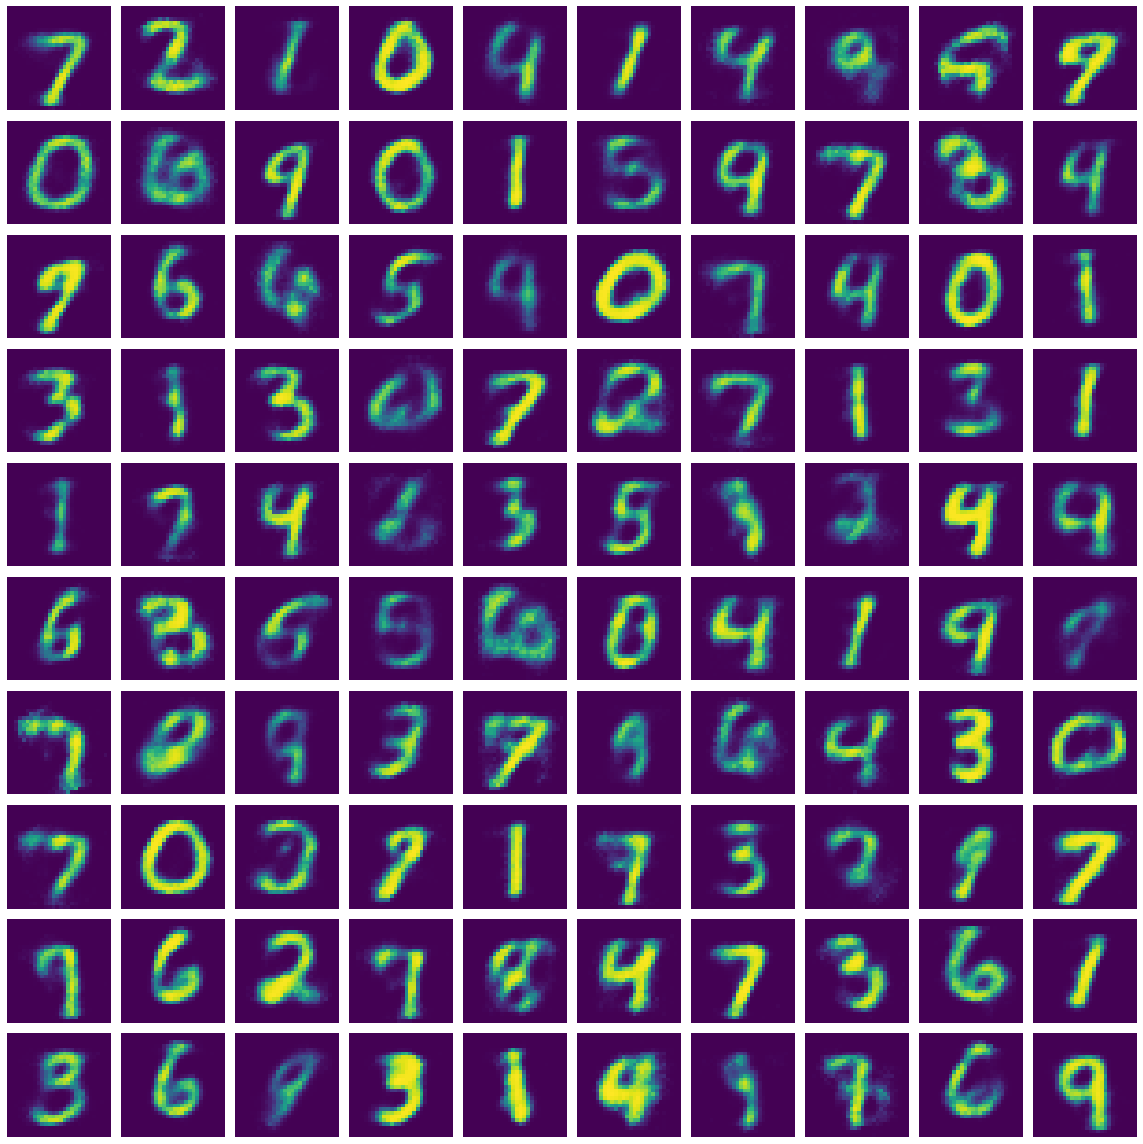

In [37]:
task5_vae20.plot_generations(dataset=dataset_val,
                             n_samples=100,
                             shape=(10, 10),
                             base_size=(1.6, 1.6),
                             device="cuda");

#### Podzadatak 2 - Disbalans tijekom učenja

U jednoj iteraciji provedite treniranje diskriminatora s dvije minigrupe, a generatora s jednom minigrupom. Vizualizirajte generirane uzorke. Ponovite isti postupak, samo zamijenite mjesta generatora i diskriminatora. Komentirajte rezultate.

**Odgovor**

Pokrenut ćemo učenje za obje mreže odjednom, ali napravit ćemo nove diskriminatore:

In [38]:
task5_discriminator_2 = Discriminator(in_channels=1,
                                      channels=(64, 128, 256, 512, 1),
                                      kernels=(4, 4, 4, 4, 4),
                                      strides=(2, 2, 2, 2, 1),
                                      padding=(1, 1, 1, 1, 0),
                                      leaky_relu_slope=0.2,
                                      use_batch_norm=True)

task5_generator_2 = Generator(input_size=100,
                              channels=(512, 256, 128, 64, 1),
                              kernels=(4, 4, 4, 4, 4),
                              strides=(1, 2, 2, 2, 2),
                              padding=(0, 1, 1, 1, 1),
                              leaky_relu_slope=0.2,
                              use_batch_norm=True)

task5_discriminator_3 = Discriminator(in_channels=1,
                                      channels=(64, 128, 256, 512, 1),
                                      kernels=(4, 4, 4, 4, 4),
                                      strides=(2, 2, 2, 2, 1),
                                      padding=(1, 1, 1, 1, 0),
                                      leaky_relu_slope=0.2,
                                      use_batch_norm=True)

task5_generator_3 = Generator(input_size=100,
                              channels=(512, 256, 128, 64, 1),
                              kernels=(4, 4, 4, 4, 4),
                              strides=(1, 2, 2, 2, 2),
                              padding=(0, 1, 1, 1, 1),
                              leaky_relu_slope=0.2,
                              use_batch_norm=True)

task5_dcgan_21 = DCGAN(discriminator=task5_discriminator_2,
                       generator=task5_generator_2)
task5_dcgan_12 = DCGAN(discriminator=task5_discriminator_3,
                       generator=task5_generator_3)

In [39]:
if os.path.exists(GAN21BN_WEIGHTS_PATH):
    task5_dcgan_21.load_state_dict(torch.load(GAN21BN_WEIGHTS_PATH))
    print(f"Učitan model s {GAN21BN_WEIGHTS_PATH}!")
else:
    task5_dcgan_21.fit(dataset=dataset_gan_tr,
                       n_epochs=20,
                       batch_size=256,
                       learning_rate=3e-4,
                       lr_gamma=0.91,
                       device=default_device,
                       discriminator_batches_till_step=2,
                       generator_batches_till_step=1,
                       verbose=1)

    torch.save(task5_dcgan_21.state_dict(), GAN21BN_WEIGHTS_PATH)

Učitan model s models/task-5/gan21bn.pt!


In [40]:
if os.path.exists(GAN12BN_WEIGHTS_PATH):
    task5_dcgan_12.load_state_dict(torch.load(GAN12BN_WEIGHTS_PATH))
    print(f"Učitan model s {GAN12BN_WEIGHTS_PATH}!")
else:
    task5_dcgan_12.fit(dataset=dataset_gan_tr,
                       n_epochs=20,
                       batch_size=256,
                       learning_rate=3e-4,
                       lr_gamma=0.91,
                       device=default_device,
                       discriminator_batches_till_step=1,
                       generator_batches_till_step=2,
                       verbose=1)

    torch.save(task5_dcgan_12.state_dict(), GAN12BN_WEIGHTS_PATH)

Učitan model s models/task-5/gan12bn.pt!


Sad opet možemo analizirati rezultate:

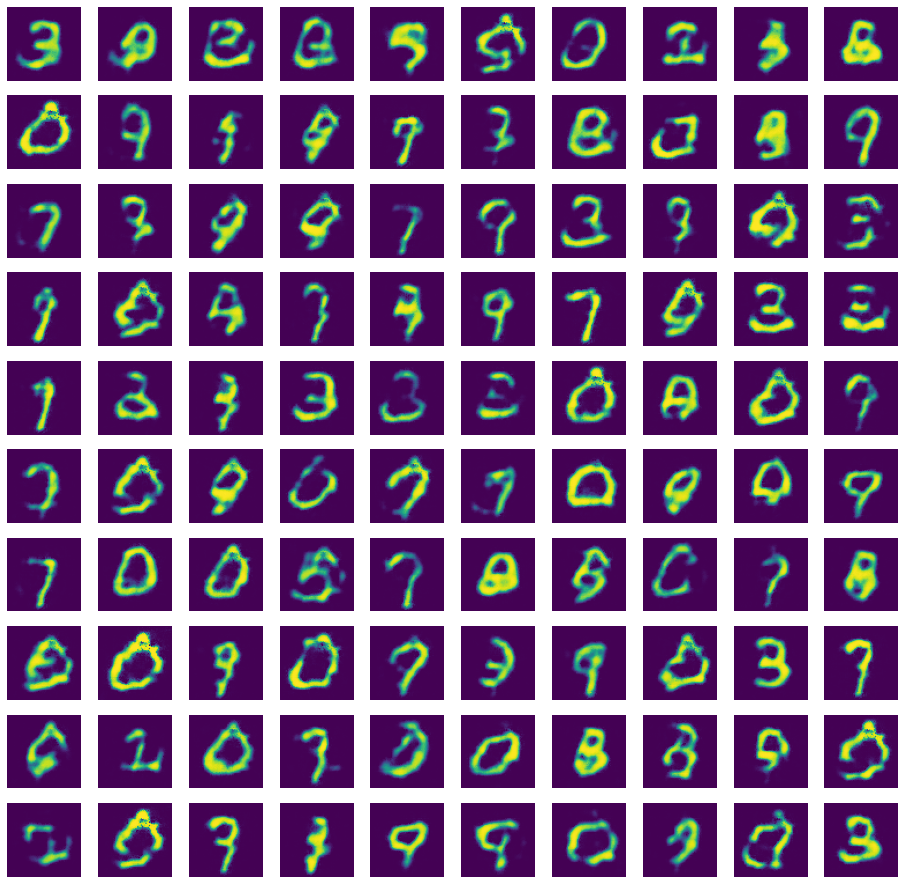

In [41]:
task5_dcgan_21.plot_generations(n_samples=100,
                                shape=(10, 10),
                                base_size=(1.6, 1.6),
                                device="cuda");

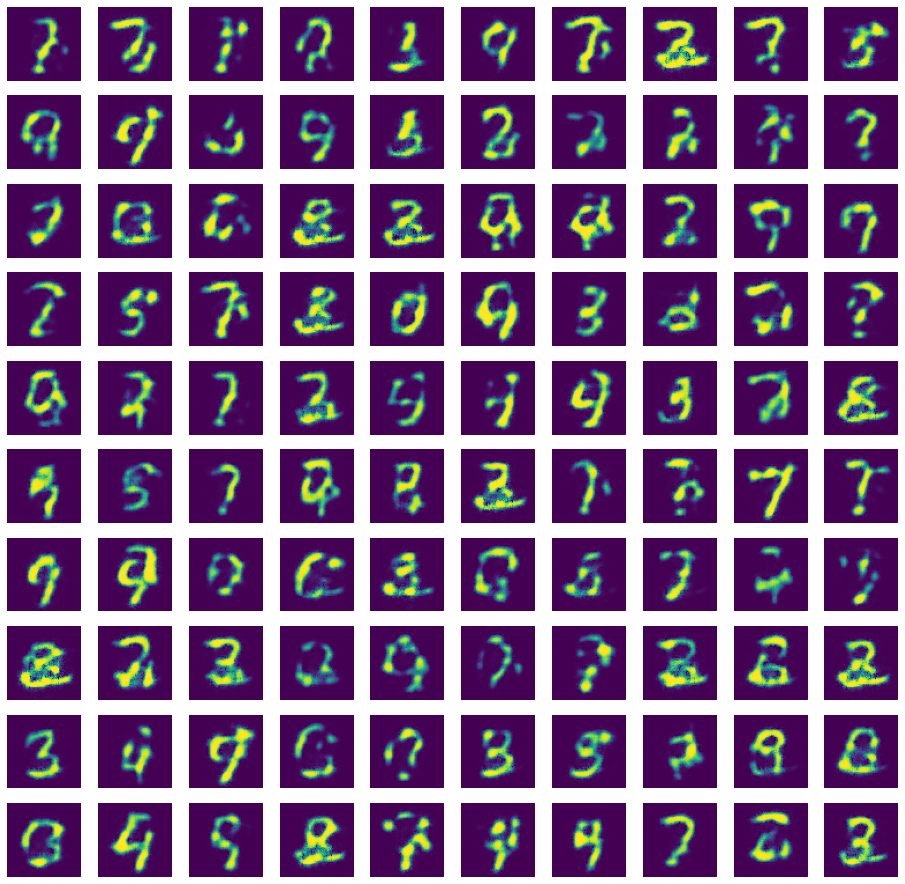

In [42]:
task5_dcgan_12.plot_generations(n_samples=100,
                                shape=(10, 10),
                                base_size=(1.6, 1.6),
                                device="cuda");

#### Podzadatak 3 - Disbalans tijekom učenja bez grupne normalizacije

Isključite batch normalizaciju u obje mreže. Komentirajte rezultate.

**Odgovor**

Kao i prije, moramo stvoriti nove objekte i ponovno istrenirati mreže:

In [43]:
task5_discriminator_4 = Discriminator(in_channels=1,
                                      channels=(64, 128, 256, 512, 1),
                                      kernels=(4, 4, 4, 4, 4),
                                      strides=(2, 2, 2, 2, 1),
                                      padding=(1, 1, 1, 1, 0),
                                      leaky_relu_slope=0.2,
                                      use_batch_norm=False)

task5_generator_4 = Generator(input_size=100,
                              channels=(512, 256, 128, 64, 1),
                              kernels=(4, 4, 4, 4, 4),
                              strides=(1, 2, 2, 2, 2),
                              padding=(0, 1, 1, 1, 1),
                              leaky_relu_slope=0.2,
                              use_batch_norm=False)

task5_discriminator_5 = Discriminator(in_channels=1,
                                      channels=(64, 128, 256, 512, 1),
                                      kernels=(4, 4, 4, 4, 4),
                                      strides=(2, 2, 2, 2, 1),
                                      padding=(1, 1, 1, 1, 0),
                                      leaky_relu_slope=0.2,
                                      use_batch_norm=False)

task5_generator_5 = Generator(input_size=100,
                              channels=(512, 256, 128, 64, 1),
                              kernels=(4, 4, 4, 4, 4),
                              strides=(1, 2, 2, 2, 2),
                              padding=(0, 1, 1, 1, 1),
                              leaky_relu_slope=0.2,
                              use_batch_norm=False)

task5_dcgan_21_nobn = DCGAN(discriminator=task5_discriminator_4,
                            generator=task5_generator_4)
task5_dcgan_12_nobn = DCGAN(discriminator=task5_discriminator_5,
                            generator=task5_generator_5)

In [44]:
if os.path.exists(GAN21_WEIGHTS_PATH):
    task5_dcgan_21_nobn.load_state_dict(torch.load(GAN21_WEIGHTS_PATH))
    print(f"Učitan model s {GAN21_WEIGHTS_PATH}!")
else:
    task5_dcgan_21_nobn.fit(dataset=dataset_gan_tr,
                            n_epochs=20,
                            batch_size=256,
                            learning_rate=3e-4,
                            lr_gamma=0.91,
                            device=default_device,
                            discriminator_batches_till_step=2,
                            generator_batches_till_step=1,
                            verbose=1)

    torch.save(task5_dcgan_21_nobn.state_dict(), GAN21_WEIGHTS_PATH)

Učitan model s models/task-5/gan21.pt!


In [45]:
if os.path.exists(GAN12_WEIGHTS_PATH):
    task5_dcgan_12_nobn.load_state_dict(torch.load(GAN12_WEIGHTS_PATH))
    print(f"Učitan model s {GAN12_WEIGHTS_PATH}!")
else:
    task5_dcgan_12_nobn.fit(dataset=dataset_gan_tr,
                            n_epochs=20,
                            batch_size=256,
                            learning_rate=3e-4,
                            lr_gamma=0.91,
                            device=default_device,
                            discriminator_batches_till_step=1,
                            generator_batches_till_step=2,
                            verbose=1)

    torch.save(task5_dcgan_12_nobn.state_dict(), GAN12_WEIGHTS_PATH)

Učitan model s models/task-5/gan12.pt!


Prikazat ćemo rezultate kao i prije:

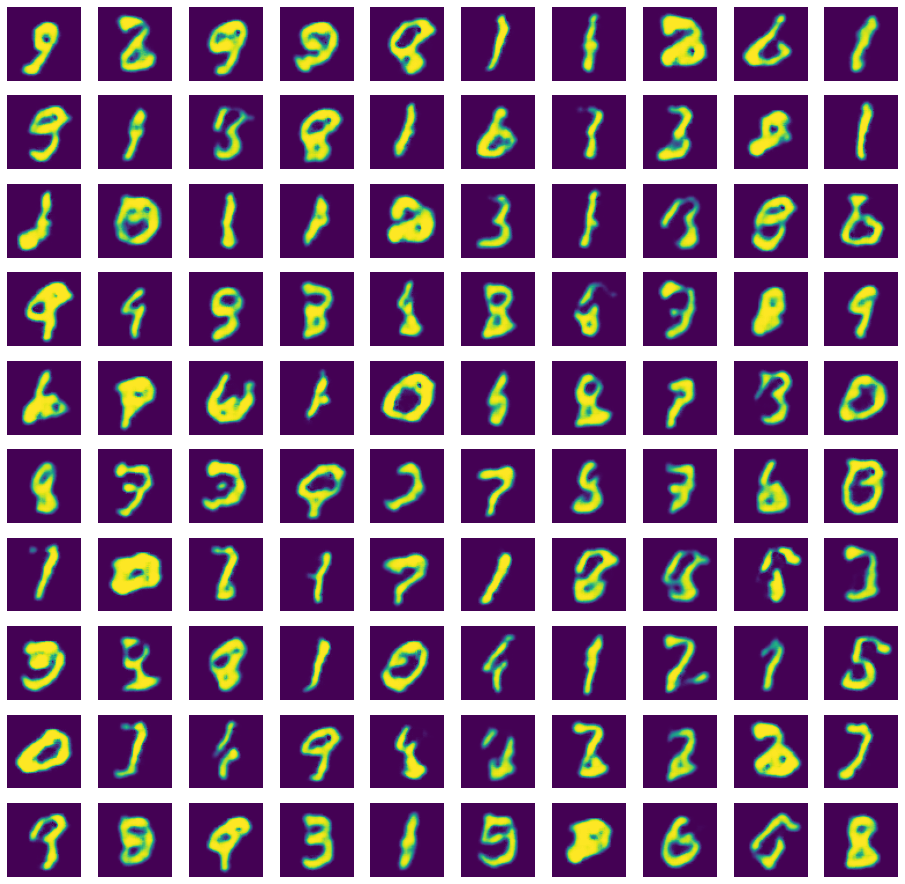

In [46]:
task5_dcgan_21_nobn.plot_generations(n_samples=100,
                                     shape=(10, 10),
                                     base_size=(1.6, 1.6),
                                     device="cuda");

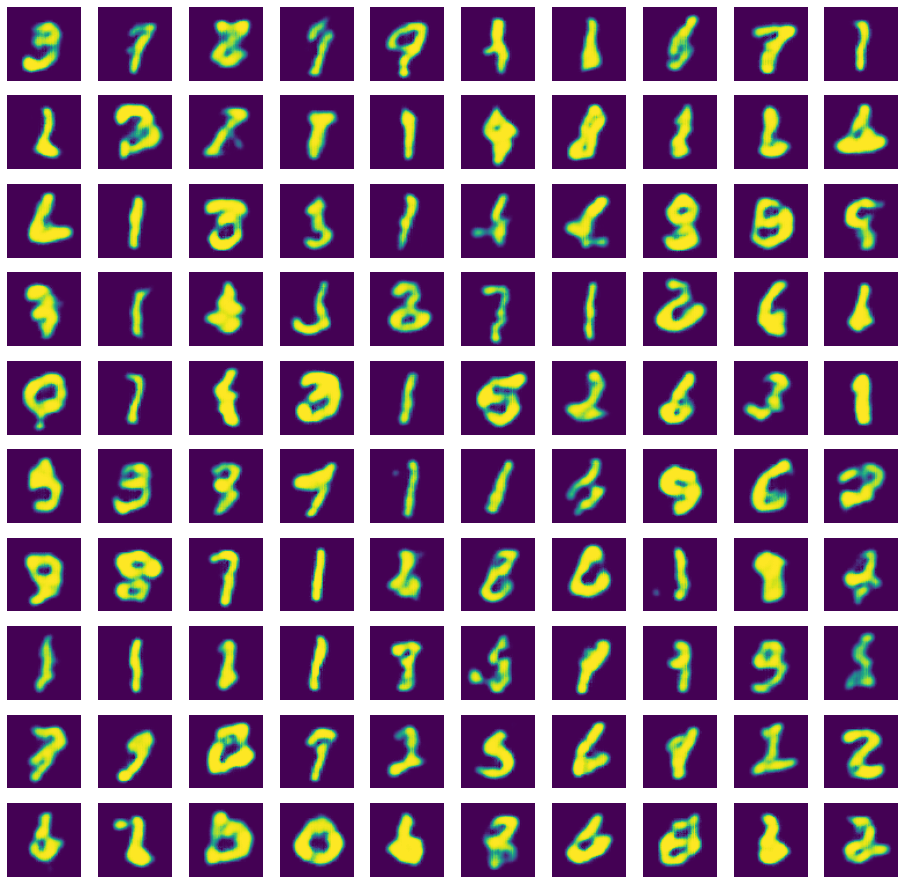

In [47]:
task5_dcgan_12_nobn.plot_generations(n_samples=100,
                                     shape=(10, 10),
                                     base_size=(1.6, 1.6),
                                     device="cuda");